# Задача 1

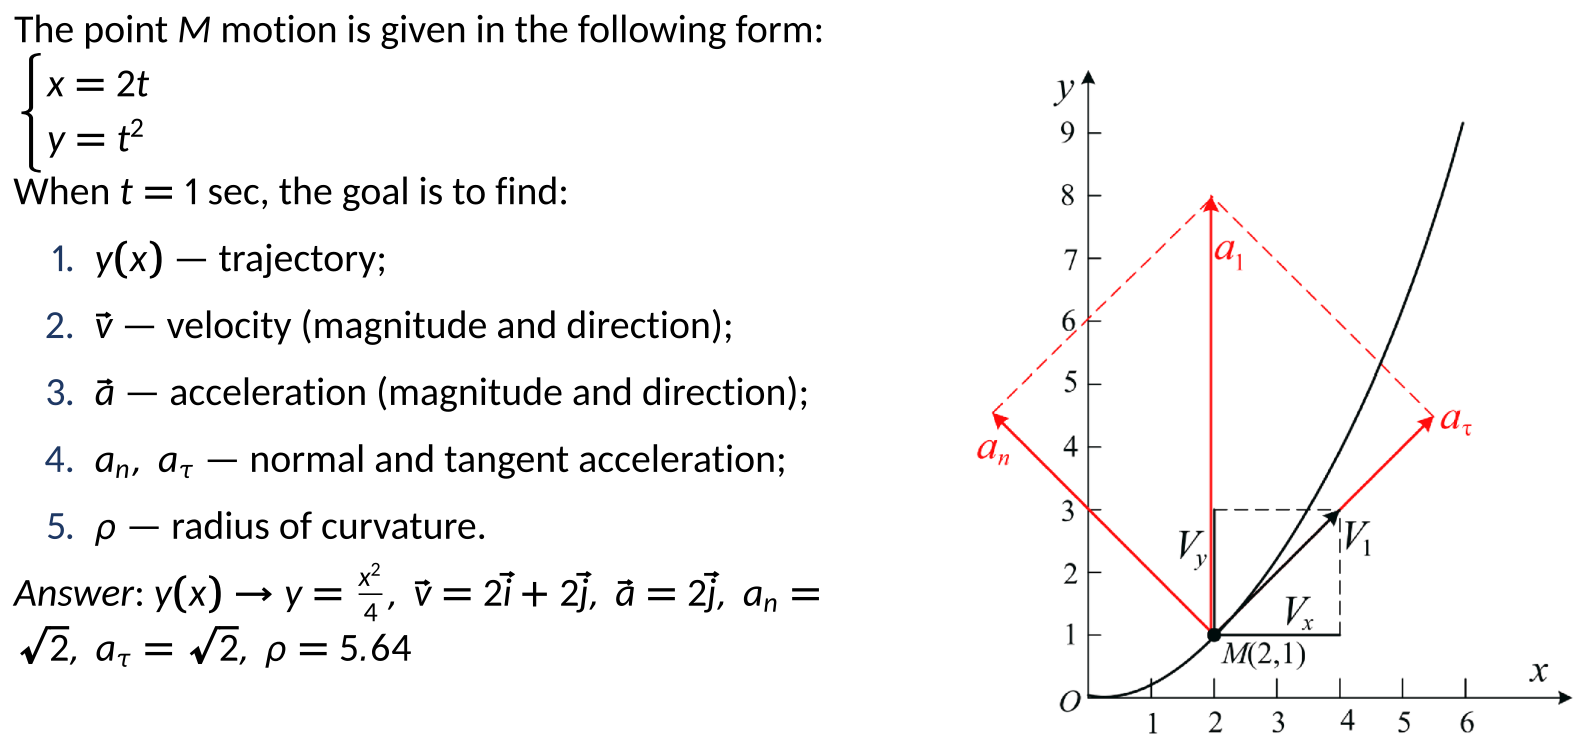

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as pltp
from matplotlib.animation import FuncAnimation, PillowWriter
from numpy import exp, pi, array, asarray
from sympy.solvers import solve
from sympy import Symbol, Ellipse, Point, Line, Matrix, diff

In [33]:
# use this variable to scale the graph
scale = 2
t = Symbol('t')
O = Matrix([2 * t, t**2])
V = diff(O, t)
a = diff(V, t)
at = a.dot(V) / V.norm() * V / V.norm()
an = a - at


In [23]:
x = sp.Symbol('x')
y = sp.Symbol('y')
yx = sp.Eq(y,sp.solve([sp.Eq(x,O[0]),sp.Eq(y,O[1])],[t,y])[0][1])
display(yx)

Eq(y, x**2/4)

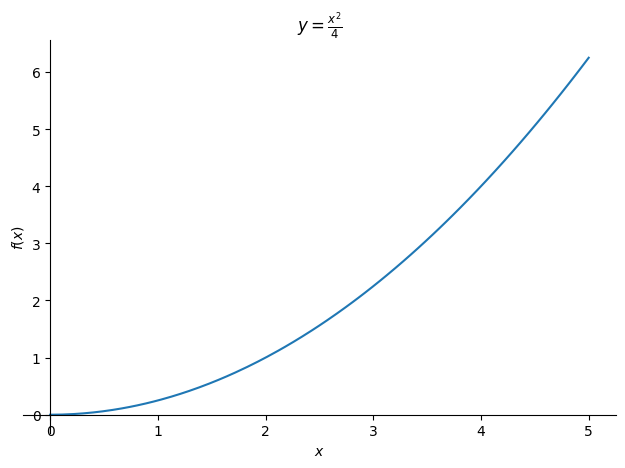

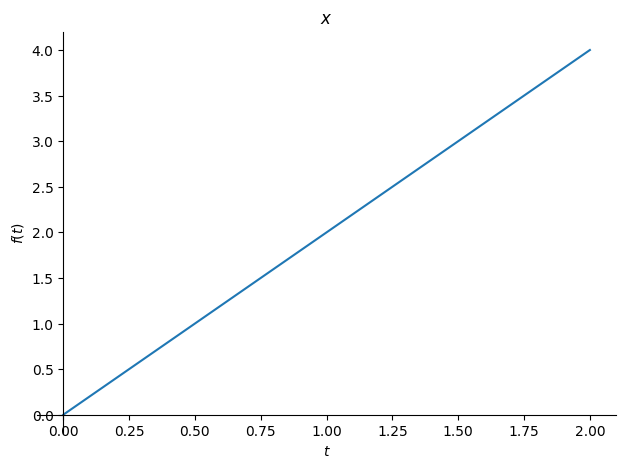

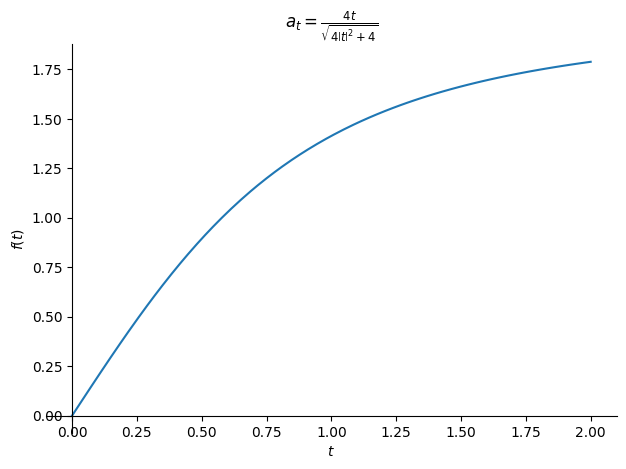

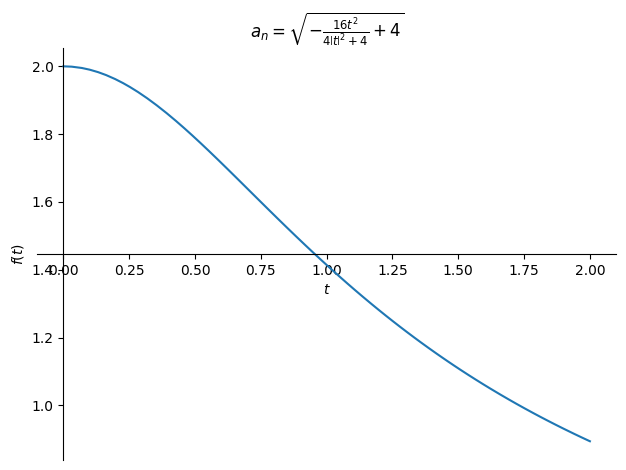

In [61]:
t_final = 2
sp.plot(yx.rhs,(x, 0, 5),title="$"+sp.latex(yx)+"$")
sp.plot(O[0],(t, 0, 2),title="$"+sp.latex(x)+"$")
sp.plot(a.dot(V) / V.norm(),(t, 0, 2),title="$"+sp.latex(sp.Eq(sp.Symbol("a_t"),a.dot(V) / V.norm()))+"$")
sp.plot(sp.sqrt(a.norm()**2-(a.dot(V) / V.norm())**2),(t, 0, 2),title="$"+sp.latex(sp.Eq(sp.Symbol("a_n"),sp.sqrt(a.norm()**2-(a.dot(V) / V.norm())**2)))+"$")

In [26]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
xdata, ydata = [], []
ln, = plt.plot([], [], 'b-')

vecs = []

# animation initialisation
def init_task1():
    ax.set_xlim(-50 / scale, 50 / scale)
    ax.set_ylim(-1 / scale, 105 / scale)
    plt.xlabel('x')
    plt.ylabel('y(x)')
    plt.grid()
    plt.title('Scale: {}'.format(scale))
    return ln,

# animation update on every frame
def update_task1(frame):
    # substitute frame for time variable
    # in sympy objects
    Of = O.subs(t, frame)
    Vf = V.subs(t, frame)
    af = a.subs(t, frame)
    atf = at.subs(t, frame)
    anf = an.subs(t, frame)

    # remove all the vectors on the graph
    while len(vecs):
        vecs[-1].remove()
        vecs.pop()

    # draw new vectors at the corresponding point
    vecs.extend([
        plt.quiver([float(Of[0])], [float(Of[1])], [float(i[0])], [float(i[1])], units='xy', scale = 1, scale_units='xy', angles='xy', color=color)
        for i, color in zip([Vf, af, atf, anf], ['black', 'green', 'red', 'blue'])
    ])

    # draw new point on the graph
    xdata.append(Of[0])
    ydata.append(Of[1])
    ln.set_data(xdata, ydata)
    return ln,

# create animation
anim = FuncAnimation(fig, update_task1, frames=np.linspace(-5, 5, 120), init_func=init_task1, blit=True)

# For using in collab, not on laptop
from IPython.display import HTML, display
display(HTML(anim.to_jshtml()))
plt.close(fig)

# For using on laptop, not collab
# plt.show()
# save animation to the file
# anim.save('task1.gif', dpi=100, writer=PillowWriter(fps=60))
# prevent unclosed plots
# plt.close('all')